In [ ]:
# Unet Architecture

In [1]:
def encoder_block(inputs, num_filters): 

	# Convolution with 3x3 filter followed by ReLU activation 
	x = tf.keras.layers.Conv2D(num_filters, 
							3, 
							padding = 'valid')(inputs) 
	x = tf.keras.layers.Activation('relu')(x) 
	
	# Convolution with 3x3 filter followed by ReLU activation 
	x = tf.keras.layers.Conv2D(num_filters, 
							3, 
							padding = 'valid')(x) 
	x = tf.keras.layers.Activation('relu')(x) 

	# Max Pooling with 2x2 filter 
	x = tf.keras.layers.MaxPool2D(pool_size = (2, 2), 
								strides = 2)(x) 
	
	return x

```python
def encoder_block(inputs, num_filters):
```
- **Input Arguments**:
  - `inputs`: This represents the input tensor (e.g., an image or feature map from a previous layer). It could be of shape `(batch_size, height, width, channels)`.
  - `num_filters`: This is the number of filters (also called kernels) to use in the convolutional layers. It controls the depth of the output feature map after the convolution operation.

#### Step 1: First Convolutional Layer
```python
x = tf.keras.layers.Conv2D(num_filters, 3, padding='valid')(inputs)
x = tf.keras.layers.Activation('relu')(x)
```
- **Conv2D Layer**:
  - `num_filters`: Specifies the number of filters (kernels) in the convolution. Each filter will extract different features from the input.
  - `3`: This is the size of the convolution filter, 3x3 in this case. This means the kernel will convolve (slide) across the input with a window size of 3x3 pixels.
  - `padding='valid'`: This means no padding is applied to the input, so the output dimensions will shrink after applying the convolution. In 'valid' padding, the filter will only apply to regions where it fits within the input image.
  
- **ReLU Activation**:
  - After the convolution, a Rectified Linear Unit (ReLU) activation function is applied. The ReLU activation works element-wise on the feature map to ensure that all negative values are zeroed out. This introduces non-linearity to the model, which helps in learning complex patterns.

#### Step 2: Second Convolutional Layer
```python
x = tf.keras.layers.Conv2D(num_filters, 3, padding='valid')(x)
x = tf.keras.layers.Activation('relu')(x)
```
- Similar to the first convolution:
  - A second convolutional layer is applied with the same filter size (3x3) and number of filters (`num_filters`).
  - Again, a ReLU activation is applied to the result of this convolution to add non-linearity.

#### Step 3: Max Pooling Layer
```python
x = tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2)(x)
```
- **MaxPooling2D**:
  - This operation reduces the spatial dimensions (height and width) of the input feature map while retaining the most important information. It does this by selecting the maximum value from a pool of values (in this case, a 2x2 region).
  - `pool_size=(2, 2)`: This means the pooling window will be 2x2, so it will look at 2x2 blocks of the input and take the maximum value from each block.
  - `strides=2`: This defines the step size of the window when moving across the input. A stride of 2 means the window will move 2 pixels at a time. This reduces the spatial resolution of the input by half.

#### Step 4: Return the Output
```python
return x
```
- The function returns the output after passing through the two convolutional layers followed by max pooling. The returned tensor `x` will have reduced spatial dimensions (height and width) due to the max pooling operation, but will have the same depth (number of channels) as the input to the encoder block.

### Summary of the Encoder Block
This block is a basic building block for a CNN that extracts features from an input image and reduces its spatial resolution through max pooling. The process consists of:
1. Two convolutional layers with 3x3 filters, each followed by ReLU activation.
2. A max pooling layer that reduces the spatial dimensions of the feature map by half.

This encoder block is typically stacked multiple times in deep neural networks to progressively extract more complex features while reducing the spatial dimensions of the input image. The resulting feature maps can be used in further layers for tasks like classification or segmentation.

### Why Use This Architecture?
- **Convolutional Layers**: These extract important features like edges, textures, and patterns from the input image.
- **ReLU Activation**: Adds non-linearity, allowing the network to learn complex patterns.
- **Max Pooling**: Helps to reduce the size of the feature maps (which reduces computational cost and helps with generalization) while preserving important features.


In [2]:
def decoder_block(inputs, skip_features, num_filters): 

	# Upsampling with 2x2 filter 
	x = tf.keras.layers.Conv2DTranspose(num_filters, 
										(2, 2), 
										strides = 2, 
										padding = 'valid')(inputs) 
	
	# Copy and crop the skip features 
	# to match the shape of the upsampled input 
	skip_features = tf.image.resize(skip_features, 
									size = (x.shape[1], 
											x.shape[2])) 
	x = tf.keras.layers.Concatenate()([x, skip_features]) 
	
	# Convolution with 3x3 filter followed by ReLU activation 
	x = tf.keras.layers.Conv2D(num_filters, 
							3, 
							padding = 'valid')(x) 
	x = tf.keras.layers.Activation('relu')(x) 

	# Convolution with 3x3 filter followed by ReLU activation 
	x = tf.keras.layers.Conv2D(num_filters, 3, padding = 'valid')(x) 
	x = tf.keras.layers.Activation('relu')(x) 
	
	return x


```python
def decoder_block(inputs, skip_features, num_filters):
```
- **Input Arguments**:
  - `inputs`: The input tensor to this decoder block. This is the output of the previous decoder block or the bottleneck layer, typically with smaller spatial dimensions (height and width) than the original image.
  - `skip_features`: These are the features from an earlier layer in the network (usually from the encoder part of a U-Net model). These features are typically preserved at higher spatial resolutions and help the decoder block reconstruct finer details.
  - `num_filters`: The number of filters used in the convolution layers. This determines the depth of the output feature maps.

#### Step 1: Upsampling Layer
```python
x = tf.keras.layers.Conv2DTranspose(num_filters, 
                                    (2, 2), 
                                    strides=2, 
                                    padding='valid')(inputs)
```
- **Conv2DTranspose Layer** (also known as a "deconvolution" or "upsampling convolution"):
  - This layer performs upsampling on the input tensor. The main goal of this layer is to increase the spatial dimensions (height and width) of the feature map, effectively reversing the downsampling that occurred during the encoding (convolution) part of the network.
  - `num_filters`: The number of filters used to create the output. It will control the depth (channels) of the upsampled feature map.
  - `(2, 2)`: The filter size is 2x2, meaning the layer will learn 2x2 kernels to apply during the upsampling process.
  - `strides=2`: The stride size of the convolution operation. A stride of 2 means that the layer will upsample the feature map by a factor of 2 in both height and width.
  - `padding='valid'`: No padding is applied, so the output dimensions will shrink after the convolution operation. However, in most cases, the spatial dimensions are increased by the `Conv2DTranspose` operation.

#### Step 2: Resize and Concatenate Skip Features
```python
skip_features = tf.image.resize(skip_features, 
                                size=(x.shape[1], x.shape[2])) 
x = tf.keras.layers.Concatenate()([x, skip_features])
```
- **Resizing Skip Features**:
  - The skip features are the output from the encoder block, which are typically larger in spatial dimensions than the upsampled feature map (`x`).
  - `tf.image.resize(skip_features, size=(x.shape[1], x.shape[2]))`: This operation resizes the skip features to match the height and width of the upsampled tensor `x`. The goal is to make the feature maps from the encoder and decoder match in size so they can be concatenated.
  
- **Concatenate Layer**:
  - `tf.keras.layers.Concatenate()([x, skip_features])`: After resizing, the skip features are concatenated with the upsampled feature map along the last axis (the channels). This step allows the network to use both the high-level features from the decoder (which were downsampled during encoding) and the detailed, spatially higher-resolution features from the encoder.
  - The concatenation enables the network to preserve fine-grained spatial information, which is crucial for pixel-wise tasks like segmentation.

#### Step 3: Convolution Layer 1
```python
x = tf.keras.layers.Conv2D(num_filters, 3, padding='valid')(x)
x = tf.keras.layers.Activation('relu')(x)
```
- **Conv2D Layer**:
  - This is a standard convolutional layer with a 3x3 kernel, which helps refine the feature map after concatenating the skip features.
  - `num_filters`: Specifies the number of filters used in this convolution, which controls the depth (number of channels) of the output feature map.
  - `3`: The filter size is 3x3, meaning the kernel will convolve across the feature map using a 3x3 window.
  - `padding='valid'`: No padding is applied, so the spatial dimensions of the feature map will decrease as a result of the convolution.
  
- **ReLU Activation**:
  - A ReLU activation is applied to the result of the convolution to introduce non-linearity. This helps the network to learn complex patterns and features.

#### Step 4: Convolution Layer 2
```python
x = tf.keras.layers.Conv2D(num_filters, 3, padding='valid')(x)
x = tf.keras.layers.Activation('relu')(x)
```
- This is another convolutional layer, similar to the previous one. It performs a second refinement step for the feature map.
  - It uses the same filter size (3x3) and number of filters (`num_filters`).
  - A ReLU activation is applied to the output, introducing further non-linearity.

#### Step 5: Return the Output
```python
return x
```
- The function returns the output of the decoder block after the upsampling, concatenation with skip features, and two convolutional operations. The output tensor `x` is a refined feature map with increased spatial dimensions, combining high-level features from the bottleneck with detailed spatial information from the encoder.

### Summary of the Decoder Block
This decoder block is designed to upsample the feature maps, combine them with the skip features from the encoder, and refine the features through convolution operations. The key steps include:
1. **Upsampling**: Using a `Conv2DTranspose` layer to increase the spatial dimensions of the input feature map.
2. **Skip Feature Integration**: Resizing the skip features and concatenating them with the upsampled feature map to combine high-level and fine-grained information.
3. **Refinement**: Using two convolutional layers with ReLU activations to refine the combined feature map.

This block is crucial for tasks like image segmentation because it helps the network to produce a detailed output (e.g., pixel-wise class prediction) by combining both coarse and fine features from the network.

In [3]:
# Unet code 
import tensorflow as tf 

def unet_model(input_shape = (256, 256, 3), num_classes = 1): 
	inputs = tf.keras.layers.Input(input_shape) 
	
	# Contracting Path 
	s1 = encoder_block(inputs, 64) 
	s2 = encoder_block(s1, 128) 
	s3 = encoder_block(s2, 256) 
	s4 = encoder_block(s3, 512) 
	
	# Bottleneck 
	b1 = tf.keras.layers.Conv2D(1024, 3, padding = 'valid')(s4) 
	b1 = tf.keras.layers.Activation('relu')(b1) 
	b1 = tf.keras.layers.Conv2D(1024, 3, padding = 'valid')(b1) 
	b1 = tf.keras.layers.Activation('relu')(b1) 
	
	# Expansive Path 
	s5 = decoder_block(b1, s4, 512) 
	s6 = decoder_block(s5, s3, 256) 
	s7 = decoder_block(s6, s2, 128) 
	s8 = decoder_block(s7, s1, 64) 
	
	# Output 
	outputs = tf.keras.layers.Conv2D(num_classes, 
									1, 
									padding = 'valid', 
									activation = 'sigmoid')(s8) 
	
	model = tf.keras.models.Model(inputs = inputs, 
								outputs = outputs, 
								name = 'U-Net') 
	return model 

if __name__ == '__main__': 
	model = unet_model(input_shape=(572, 572, 3), num_classes=2) 
	model.summary()


Model: "U-Net"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 572, 572, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 570, 570, 64)         1792      ['input_1[0][0]']             
                                                                                                  
 activation (Activation)     (None, 570, 570, 64)         0         ['conv2d[0][0]']              
                                                                                                  
 conv2d_1 (Conv2D)           (None, 568, 568, 64)         36928     ['activation[0][0]']          
                                                                                              

### 1. **Imports and Function Definitions**
```python
import tensorflow as tf 
```
- The TensorFlow library is imported, which is used to build and train the model. TensorFlow's Keras API provides the necessary building blocks for constructing neural network architectures.

### 2. **The `unet_model` Function**
```python
def unet_model(input_shape=(256, 256, 3), num_classes=1):
```
- **`input_shape`**: The input size of the image that the model will process. The default is `(256, 256, 3)`, meaning each input image is 256x256 pixels with 3 color channels (RGB).
- **`num_classes`**: The number of output classes. Since this is segmentation, each pixel in the output corresponds to a class label. The default is `1` (for binary segmentation). If `num_classes=2`, the output will have two classes (for binary segmentation with two possible classes, like foreground vs background).

### 3. **Input Layer**
```python
inputs = tf.keras.layers.Input(input_shape)
```
- This creates the input layer, specifying the shape of the input images. This tensor will be the starting point for the U-Net model.

### 4. **Contracting Path (Encoder)**
```python
s1 = encoder_block(inputs, 64) 
s2 = encoder_block(s1, 128) 
s3 = encoder_block(s2, 256) 
s4 = encoder_block(s3, 512)
```
- The encoder part of U-Net consists of several **encoder blocks**, which downsample the input image and extract increasingly abstract features. 
- Each encoder block performs two convolution operations followed by a max-pooling operation to reduce the spatial dimensions.
  - `encoder_block(inputs, 64)` processes the input with 64 filters, then `encoder_block(s1, 128)` processes the output of the previous block with 128 filters, and so on. 
  - The number of filters in each encoder block typically doubles with each step as the model learns more complex features.
  
### 5. **Bottleneck Layer**
```python
b1 = tf.keras.layers.Conv2D(1024, 3, padding='valid')(s4)
b1 = tf.keras.layers.Activation('relu')(b1)
b1 = tf.keras.layers.Conv2D(1024, 3, padding='valid')(b1)
b1 = tf.keras.layers.Activation('relu')(b1)
```
- The **bottleneck** is the middle layer of the U-Net, where the feature maps have the smallest spatial dimensions (due to the downsampling performed by the encoder).
- Here, two convolutional layers with 1024 filters are applied to the features from the encoder's last block (`s4`). These convolutions capture high-level features, and ReLU activations add non-linearity to the transformations.

### 6. **Expansive Path (Decoder)**
```python
s5 = decoder_block(b1, s4, 512)
s6 = decoder_block(s5, s3, 256)
s7 = decoder_block(s6, s2, 128)
s8 = decoder_block(s7, s1, 64)
```
- The **decoder** (or expansive path) is responsible for upsampling the feature maps and bringing them back to the original spatial resolution (similar to the input).
- Each `decoder_block` upsamples the input tensor and concatenates it with the corresponding "skip" connection from the encoder. This helps retain fine-grained spatial information that was lost during downsampling. The number of filters used in the decoder blocks reduces progressively (from 512 to 64).
  
  The decoder blocks work as follows:
  - `decoder_block(b1, s4, 512)` takes the bottleneck output and upsamples it to match the size of `s4`, and so on for the rest of the decoder blocks.

### 7. **Output Layer**
```python
outputs = tf.keras.layers.Conv2D(num_classes, 1, padding='valid', activation='sigmoid')(s8)
```
- The output layer is a convolutional layer with a filter size of `1x1` (a common choice for segmentation tasks). This layer reduces the depth of the feature map to the desired number of classes (i.e., `num_classes`).
- The **sigmoid activation** is used for binary segmentation (for `num_classes=1`). If `num_classes > 1`, you would typically use `softmax` activation to handle multi-class segmentation.
  
### 8. **Model Definition**
```python
model = tf.keras.models.Model(inputs=inputs, outputs=outputs, name='U-Net')
```
- The Keras `Model` is created by specifying the input and output layers. This model will perform the segmentation task by processing images through the encoder, bottleneck, and decoder blocks.
  
### 9. **Model Summary**
```python
model.summary()
```
- This line prints the summary of the model, showing the layer types, output shapes, and the number of parameters at each layer.

### 10. **Main Section**
```python
if __name__ == '__main__':
    model = unet_model(input_shape=(572, 572, 3), num_classes=2)
    model.summary()
```
- This section is a script that creates a U-Net model with an input shape of `(572, 572, 3)` and `2` output classes. It then prints the model summary to give you an overview of the architecture.
  
### Detailed Overview of Key Steps:

- **Encoder (Contracting Path)**: The encoder progressively reduces the spatial dimensions while increasing the number of filters (64 → 128 → 256 → 512). This step captures high-level features of the input image.
  
- **Bottleneck**: The bottleneck has the smallest spatial dimensions, but it learns the most abstract features with large filter sizes (1024). It acts as the bridge between the encoder and the decoder.

- **Decoder (Expansive Path)**: The decoder upsamples the features, restores the spatial resolution, and merges (concatenates) features from the corresponding encoder layers (skip connections). This helps retain fine-grained spatial details while reconstructing the segmentation map.

- **Skip Connections**: These are the key feature of U-Net, where information from earlier (contracting) layers is directly passed to the corresponding (expansive) layers to preserve spatial resolution and improve segmentation accuracy.

### Conclusion
This code defines a U-Net model, a type of convolutional neural network used for image segmentation. It features an encoder-decoder architecture with skip connections, allowing it to perform pixel-level classification tasks like segmenting an image into multiple classes. The model can be customized with different input sizes and the number of classes for various segmentation tasks, such as medical image segmentation.

1. Input Layer:
input_1 (InputLayer): Accepts an input image of shape (572, 572, 3) (height, width, channels). The 3 channels represent a color image (RGB).
2. Contracting Path (Encoder):
This path captures the context and reduces the spatial dimensions of the input image. Each block in this path contains two convolution layers followed by a ReLU activation and a max-pooling operation.

conv2d (e.g., conv2d_1, conv2d_3, etc.): A standard 2D convolution operation that extracts features from the input. The filters start from 64 and progressively double as you go deeper into the network (128, 256, 512, etc.).
activation: ReLU activation applied after every convolution to introduce non-linearity.
max_pooling2d: A max-pooling operation applied after the activation layers to downsample the feature map and reduce spatial dimensions.
In total, there are four blocks (or stages) in the contracting path. As the layers go deeper, the number of filters increases, capturing more abstract features.

3. Bottleneck:
The bottleneck is the deepest part of the network where the most abstract features are learned. Here, two convolutional layers (with 1024 filters) are applied with a ReLU activation after each layer. This stage does not involve max-pooling or downsampling but rather learns complex features at the smallest spatial resolution.

conv2d_8 and conv2d_9: Convolution layers with 1024 filters.
activation_8 and activation_9: ReLU activations.
The output from this block represents the compressed, most abstracted features of the input image.
4. Expansive Path (Decoder):
The expansive path is designed to upsample the feature maps, gradually increasing the spatial resolution and reconstructing the segmentation map. This path also involves skip connections that concatenate the upsampled feature maps with the corresponding feature maps from the contracting path.

conv2d_transpose: These layers are transposed convolutions, also known as deconvolutions, which upsample the feature maps. For example, conv2d_transpose upsamples the 1024 feature maps to 512, 256, etc.
tf.image.resize: This operation also resizes the feature maps from the previous layer to match the corresponding feature maps from the contracting path before concatenation.
concatenate: The feature maps from the contracting path are concatenated with the upsampled feature maps. This allows the decoder to use both abstract and detailed features from the contracting path.
The decoding layers start with the largest feature map size (1024) and gradually reduce it, using a smaller number of filters as the resolution increases (512, 256, 128, 64).

5. Output Layer:
The final output layer has a 1x1 convolution to reduce the feature maps to the desired number of classes (in this case, 2). This final layer produces the segmentation map, where each pixel is assigned a class.

conv2d_18: A convolutional layer with 2 filters, one for each class (for binary segmentation).
The output shape is (388, 388, 2), which represents the segmentation map with the predicted class probabilities for each pixel.
The activation function used here is usually softmax or sigmoid depending on the number of classes (since we have 2 classes, sigmoid could be used for binary classification).
Parameters:
Total parameters: 31,031,810 (118.38 MB)
Trainable parameters: 31,031,810 (all parameters are trainable, as no layers are frozen)
Key Points:
The U-Net architecture is efficient in medical image segmentation, where high-quality spatial information is crucial.
It uses skip connections to retain fine-grained information from earlier layers (contracting path) and inject this information back into the network during upsampling (expansive path).
The network gradually reduces the spatial resolution in the contracting path and increases it in the expansive path, enabling the model to learn both high-level context and fine-grained details.
Summary of Output Shape Calculation:
The input shape is (572, 572, 3).
Through a series of convolutions and pooling, the spatial resolution reduces to (28, 28) in the bottleneck.
As the feature maps are upsampled and concatenated with corresponding feature maps from the contracting path, the output shape gradually increases back up to (388, 388, 2).
This architecture is commonly used in tasks such as segmentation of medical images, where fine-grained details are important, and the model needs to generate pixel-level predictions.

1/1 [==============================] - 2s 2s/step


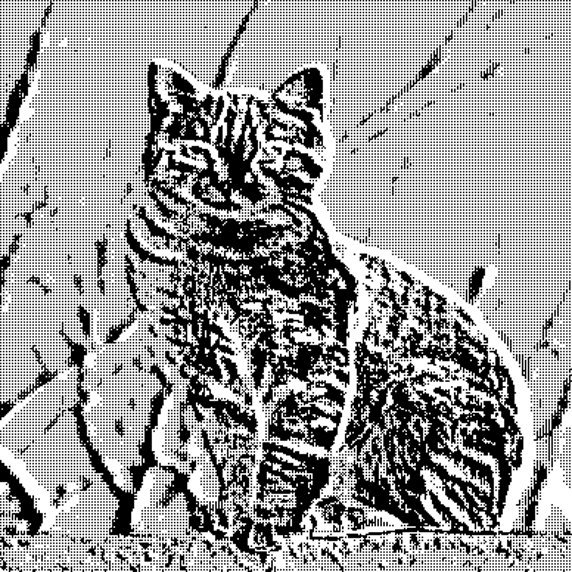

In [5]:
import numpy as np 
from PIL import Image 
from tensorflow.keras.preprocessing import image 

# Load the image 
img = Image.open('cat.jpg') 
# Preprocess the image 
img = img.resize((572, 572)) 
img_array = image.img_to_array(img) 
img_array = np.expand_dims(img_array[:,:,:3], axis=0) 
img_array = img_array / 255.

# Load the model 
model = unet_model(input_shape=(572, 572, 3), num_classes=2) 

# Make predictions 
predictions = model.predict(img_array) 

# Convert predictions to a numpy array and resize to original image size 
predictions = np.squeeze(predictions, axis=0) 
predictions = np.argmax(predictions, axis=-1) 
predictions = Image.fromarray(np.uint8(predictions*255)) 
predictions = predictions.resize((img.width, img.height)) 

# Save the predicted image 
predictions.save('predicted_image.jpg') 
predictions

1. **Loading and Preprocessing the Image**:
   - The image is loaded using `PIL.Image.open` and resized to the target size (572x572) that matches the input dimensions of the U-Net model.
   - `image.img_to_array` converts the image into a NumPy array, and `np.expand_dims` adds an extra dimension for batch size (which is 1 in this case).
   - The image array is normalized by dividing it by 255 to scale pixel values to the range [0, 1].

2. **Model Prediction**:
   - The `unet_model` function is expected to return a model with the specified input shape and number of classes (2 in this case, which is typical for binary segmentation).
   - The `model.predict` function generates predictions for the input image.

3. **Post-Processing the Predictions**:
   - `np.squeeze(predictions, axis=0)` removes the batch dimension (since batch size is 1).
   - `np.argmax(predictions, axis=-1)` finds the class with the highest probability for each pixel, assuming a classification task with multiple classes.
   - The predictions are converted to an image using `Image.fromarray`, multiplied by 255 to convert from a [0, 1] range to [0, 255] for image display, and resized back to the original image size.

4. **Saving the Predicted Image**:
   - Finally, the processed prediction image is saved as 'predicted_image.jpg'.

### Ensure the following before running the code:

- The model `unet_model` must be properly defined, with input shape `(572, 572, 3)` and `num_classes=2`. The code assumes that the U-Net model architecture is available in the `unet_model` function.
- The image 'cat.jpg' must be located in the same directory as the script or provide the full path.
- If the segmentation task is for binary segmentation, the output will have pixel values of 0 or 1, which is what this code expects.

### Sample Output:
If the model performs as expected, the predicted image (e.g., 'predicted_image.jpg') should reflect the segmentation result, with one of the classes being highlighted in the segmentation map (likely class 1 corresponding to the object of interest).

1/1 [==============================] - 2s 2s/step


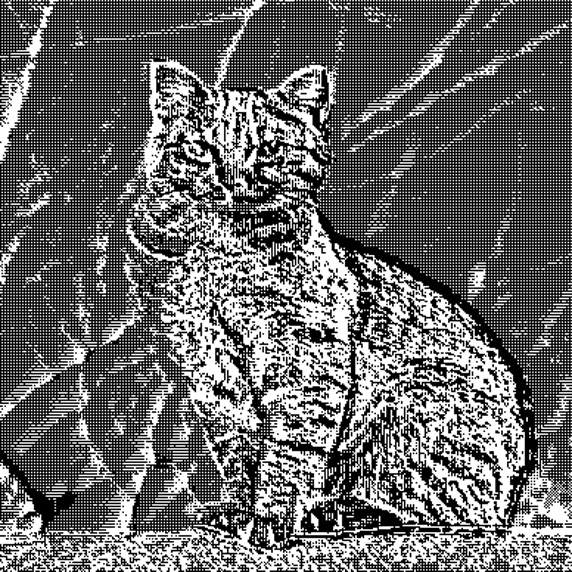

In [7]:
import numpy as np 
from PIL import Image 
from tensorflow.keras.preprocessing import image 

# Load the image 
img = Image.open('cat.jpg') 
# Preprocess the image 
img = img.resize((572, 572)) 
img_array = image.img_to_array(img) 
img_array = np.expand_dims(img_array[:,:,:3], axis=0) 
img_array = img_array / 255.

# Load the model 
model = unet_model(input_shape=(572, 572, 3), num_classes=2) 

# Make predictions 
predictions = model.predict(img_array) 

# Convert predictions to a numpy array and resize to original image size 
predictions = np.squeeze(predictions, axis=0) 
predictions = np.argmax(predictions, axis=-1) 
predictions = Image.fromarray(np.uint8(predictions*255)) 
predictions = predictions.resize((img.width, img.height)) 

# Save the predicted image 
predictions.save('predicted_image.jpg') 
predictions